<a href="https://colab.research.google.com/github/SURIYA-po/Deep-Learning-/blob/main/Imange_classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
tf.__version__


'2.19.0'

In [70]:
!pip install opencv-python
import matplotlib.pyplot as plt
import cv2
import imghdr

In [72]:
import os

In [73]:
data_dir = '/content/drive/MyDrive/Data'
image_exts = ['jpeg','jpg','bmp','png']
os.listdir(data_dir)

['happy', 'sad']

In [74]:
for image_cls in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_cls)):
    image_path = os.path.join(data_dir,image_cls,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('issue with image{}'.format(image_path))


In [75]:
import numpy as np
from matplotlib import pyplot as plt

In [76]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data')

Found 364 files belonging to 2 classes.


In [77]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
data_iterator = data.as_numpy_iterator()

In [119]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f128e3dc680>)

In [120]:
batch = data_iterator.next()

In [121]:
batch[0].shape

(32, 256, 256, 3)

In [122]:
batch[1]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int32)

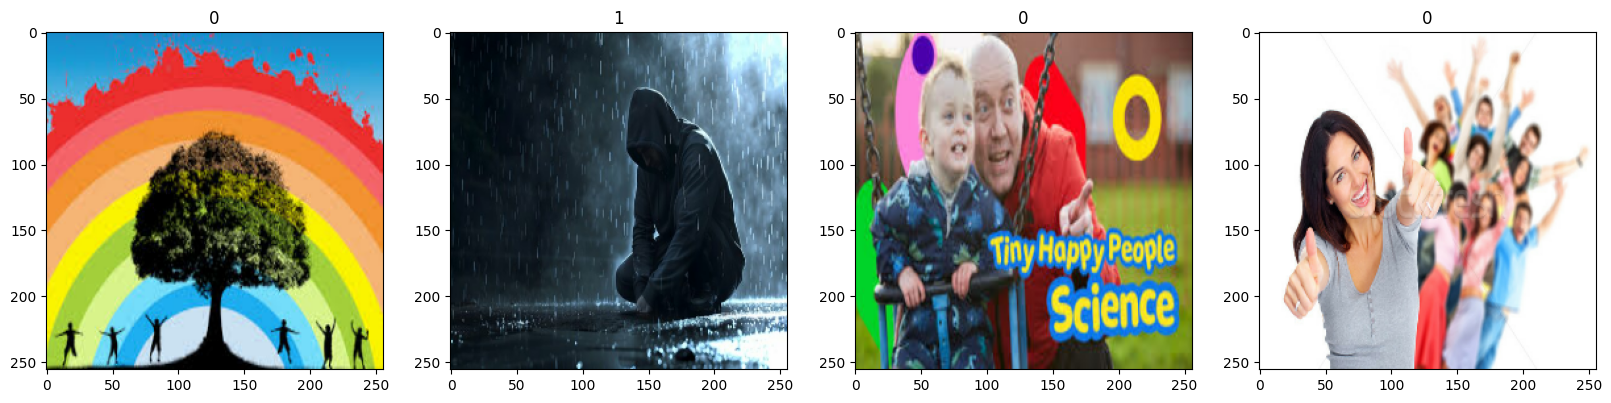

In [123]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

##**Preprocess Data**

scale data

In [84]:
data = data.map(lambda x,y: (x/255,y))

In [85]:
batch = data.as_numpy_iterator().next()

In [86]:
batch[0].max()

np.float32(1.0)

# **Split data**

In [87]:
len(data)

12

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1


In [89]:
train_size+val_size+test_size

12

In [90]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [91]:
len(train)

8

# **Deep Model**


Build Deep learning Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [97]:
logdir='/content/drive/MyDrive/Logs_of_image_recogniton_system'

In [98]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [99]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 455ms/step - accuracy: 0.5773 - loss: 0.7137 - val_accuracy: 0.6875 - val_loss: 0.5930
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.6411 - loss: 0.6166 - val_accuracy: 0.7031 - val_loss: 0.5634
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 492ms/step - accuracy: 0.6899 - loss: 0.5813 - val_accuracy: 0.7812 - val_loss: 0.4160
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.7926 - loss: 0.4659 - val_accuracy: 0.6875 - val_loss: 0.4944
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.8457 - loss: 0.3998 - val_accuracy: 0.9219 - val_loss: 0.2552
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - accuracy: 0.8362 - loss: 0.4263 - val_accuracy: 0.9375 - val_loss: 0.3242
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - accuracy: 0.8760 - loss: 0.3309 - val_accuracy: 0.9219 - val_loss: 0.2387
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.9203 - loss: 0.2236 - val_accuracy: 0.9219 - val_loss:

## Plot Performance

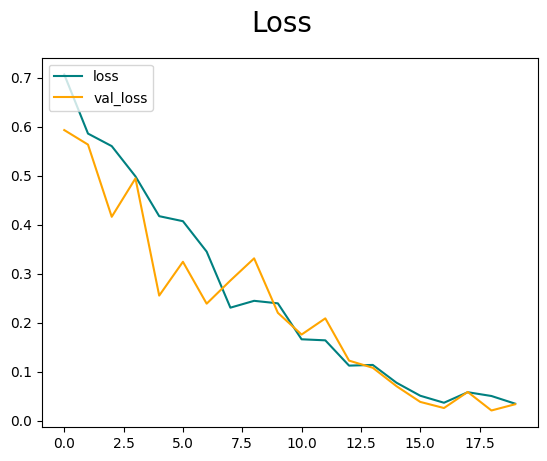

In [100]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

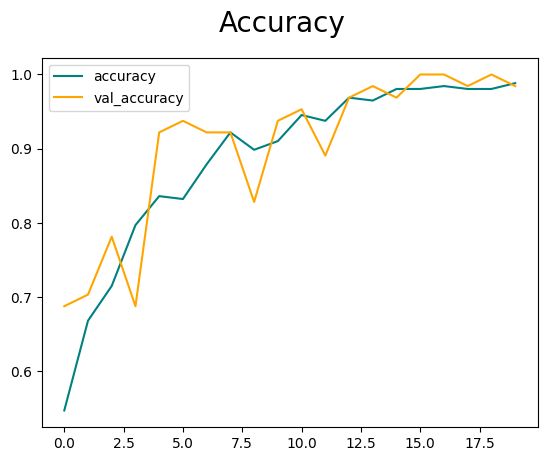

In [101]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

##**Evaluate**

In [102]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [103]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [104]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


In [105]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9411765, shape=(), dtype=float32) tf.Tensor(0.97727275, shape=(), dtype=float32)


##**TEST**

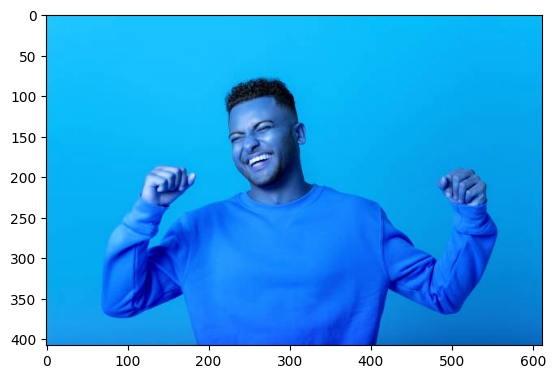

In [106]:

img = cv2.imread('/content/drive/MyDrive/Happy.jpg')
plt.imshow(img)
plt.show()

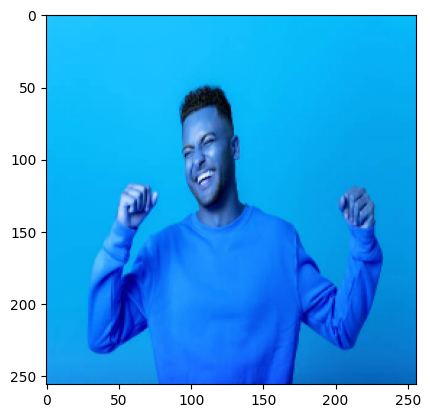

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


In [109]:
yhat

array([[1.309706e-05]], dtype=float32)

In [110]:

if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## **Save** the Model

In [111]:

from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('model_image_clsssifierr','imageclassifier.h5'))

In [114]:

new_model = load_model('/content/model_image_clsssifierr/imageclassifier.h5')

In [115]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


array([[1.309706e-05]], dtype=float32)